# **TP3: Detector de SPAM (20Co2025)**
- Bernardo Maximiliano José.
- Tacchella Alejandro Nicolás.

Uno de los problemas más comunes en la clasificación es la detección de correos electrónicos SPAM. Uno de los primeros modelos utilizados para abordar este problema fue el clasificador de Bayes ingenuo. La detección de SPAM es un problema persistente en el mundo digital, ya que los spammers continúan adaptando sus estrategias para eludir los filtros de correo no deseado. Además del clasificador de Bayes ingenuo, se han desarrollado y utilizado una variedad de técnicas más avanzadas en la detección de SPAM, que incluyen algoritmos de aprendizaje automático, redes neuronales y métodos basados en reglas.

En este trabajo práctico, utilizaremos un conjunto de datos que consta de 4601 observaciones de correos electrónicos, de los cuales 2788 son correos legítimos y 1813 son correos SPAM. Dado que el contenido de los correos electrónicos es un tipo de dato no estructurado, es necesario procesarlo de alguna manera. Para este conjunto de datos, ya se ha aplicado un procesamiento típico en el Procesamiento del Lenguaje Natural (NLP), que consiste en contar la frecuencia de palabras observadas en los correos.

El procesamiento de lenguaje natural (NLP) desempeña un papel fundamental en la detección de SPAM, ya que permite analizar el contenido de los correos electrónicos y extraer características relevantes para la clasificación. Además de contar la frecuencia de palabras, se pueden utilizar técnicas más sofisticadas, como la extracción de características semánticas y el análisis de sentimientos, para mejorar la precisión de los modelos de detección de SPAM.

En este proceso, se cuenta la cantidad de ocurrencias de cada palabra en los diferentes correos.

Con el fin de preservar la privacidad de los mensajes, la frecuencia de palabras se encuentra normalizada. El conjunto de datos está compuesto por 54 columnas de atributos que se denominan:

- **word_freq_XXXX:** Donde XXXX es la palabra o símbolo. Los valores son enteros que van de 0 a 20k.
Además, hay una columna adicional llamada spam, que es 1 si el correo es SPAM o 0 si no lo es.

Los clasificadores de Bayes ingenuos fueron los primeros filtros utilizados por las aplicaciones de correo electrónico, basados en este principio de palabras. La idea es que, partiendo de un dato a priori sobre la probabilidad de que un correo sea SPAM o no, ciertas palabras nos indicarán que la probabilidad a posteriori, dadas esas palabras, es más probable que el correo sea SPAM o no.

**Tareas y preguntas a resolver:**

1. ¿Cuáles son las 10 palabras más encontradas en correos con SPAM y en correos No SPAM? ¿Hay palabras en común? ¿Algunas llaman la atención?
2. Separe el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba (70% y 30% respectivamente).
3. Utilizando un clasificador de Bayes ingenuo, entrene con el conjunto de entrenamiento.
4. Utilizando un clasificador de Regresión Logística, entrene con el conjunto de entrenamiento (en este caso, normalice los datos).
5. Calcule la matriz de confusión del conjunto de evaluación para ambos modelos. ¿Qué tipo de error comete más cada modelo? ¿Cuál de los dos tipos de error crees que es más importante para este problema?
6. Calcule la precisión y la recuperación de ambos modelos. Para cada métrica, ¿cuál es el mejor modelo? ¿Cómo se relacionan estas métricas con los tipos de errores analizados en el punto anterior? Expanda su respuesta.
7. Obtenga la curva ROC y el AUC (Área Bajo la Curva ROC) de ambos modelos.

El entregable consiste en uno o más archivos de notebook ipynb con las respuestas. Aunque se da libertad para usar otros tipos de entregables, es importante incluir tanto el código de lo resuelto como las respuestas. Pueden subir el contenido o proporcionar un enlace a un repositorio público (GitHub o GitLab) con el contenido. No olviden especificar los autores del TP en el entregable.

### **Resolución**

#### **Instalación de dependencias**

In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


#### **Importación de bibliotecas**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

#### **Lectura del dataset**

In [3]:
df = pd.read_csv("./spambase.csv")
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,spam
0,0,640,640,0,320,0,0,0,0,0,...,0,0,0,0,0,0,778,0,0,1
1,210,280,500,0,140,280,210,70,0,940,...,0,0,0,0,132,0,372,180,48,1
2,60,0,710,0,1230,190,190,120,640,250,...,60,0,0,10,143,0,276,184,10,1
3,0,0,0,0,630,0,310,630,310,630,...,0,0,0,0,137,0,137,0,0,1
4,0,0,0,0,630,0,310,630,310,630,...,0,0,0,0,135,0,135,0,0,1


In [4]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,104.553358,213.014345,280.656379,65.424908,312.222995,95.900891,114.207564,105.294501,90.067377,239.413171,...,179.823734,5.444469,31.869159,38.574440,139.030428,16.975875,269.068898,75.810259,44.237992,0.394045
std,305.357562,1290.574888,504.142884,1395.151370,672.511666,273.824083,391.440302,401.071452,278.615864,644.755399,...,911.118627,76.274271,285.734646,243.470469,270.355374,109.394164,815.669848,245.879440,429.341596,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,420.000000,0.000000,380.000000,0.000000,0.000000,0.000000,0.000000,160.000000,...,0.000000,0.000000,0.000000,0.000000,188.000000,0.000000,315.000000,52.000000,0.000000,1.000000
max,4540.000000,14280.000000,5100.000000,42810.000000,10000.000000,5880.000000,7270.000000,11110.000000,5260.000000,18180.000000,...,22050.000000,2170.000000,10000.000000,4385.000000,9752.000000,4081.000000,32478.000000,6003.000000,19829.000000,1.000000


1. ¿Cuáles son las 10 palabras más encontradas en correos con SPAM y en correos No SPAM? ¿Hay palabras en común? ¿Algunas llaman la atención?

In [5]:
spam = df[df['spam'] == 1]
no_spam = df[df['spam'] == 0]

ten_mf_spam = spam.sum().nlargest(10)
ten_mf_no_spam = no_spam.sum().nlargest(10)

print("10 palabras más encontradas en correos SPAM:")
print(ten_mf_spam)
print("\n10 palabras más encontradas en correos NO SPAM:")
print(ten_mf_no_spam)

coincidences = ten_mf_spam.index[ten_mf_spam.index.isin(ten_mf_no_spam.index)]
print("\nCoincidencias entre spam y no spam:")
for c in coincidences.values:
    print(c)

10 palabras más encontradas en correos SPAM:
word_freq_you         4105599
word_freq_your        2502597
word_freq_will         997100
word_freq_free         939790
word_freq_our          931799
char_freq_!            931352
word_freq_all          732080
word_freq_mail         635470
word_freq_email        578759
word_freq_business     521250
dtype: int64

10 palabras más encontradas en correos NO SPAM:
word_freq_you        3541702
word_freq_george     3527559
word_freq_hp         2496576
word_freq_will       1495268
word_freq_your       1223098
word_freq_hpl        1204398
word_freq_re         1159138
word_freq_edu         800669
word_freq_address     681569
word_freq_meeting     604460
dtype: int64

Coincidencias entre spam y no spam:
word_freq_you
word_freq_your
word_freq_will


Llaman la atención palabras como "free" y "business" dentro de los correos SPAM, ya que tienen sentido en el contexto de métodos de estafa de tipo phishing.

2. Separe el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba (70% y 30% respectivamente).

In [6]:
# Ahora, vamos a dividir el conjunto de datos en características (X) y etiquetas (Y)
X = df.drop(columns='spam')
Y = df['spam']

# Luego, dividimos el conjunto en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

3. Utilizando un clasificador de Bayes ingenuo, entrene con el conjunto de entrenamiento.

In [7]:
model_nb = MultinomialNB()
model_nb.fit(X_train, y_train)

MultinomialNB()

4. Utilizando un clasificador de Regresión Logística, entrene con el conjunto de entrenamiento (en este caso, normalice los datos).

In [8]:
# Utilizamos el escalador MinMaxScaler para escalar los datos
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lo transformamos en DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

model_lg = LogisticRegression(random_state=0)
model_lg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

5. Calcule la matriz de confusión del conjunto de evaluación para ambos modelos. ¿Qué tipo de error comete más cada modelo? ¿Cuál de los dos tipos de error crees que es más importante para este problema?

In [9]:
y_pred_nb = model_nb.predict(X_test)
y_pred_lg = model_lg.predict(X_test_scaled)

In [10]:
def sens_spec(cm):
    sensitivity = cm[1, 1] / np.sum(cm[1, :])
    specifity = cm[0, 0] / np.sum(cm[0, :])
    balanced_accuracy = (sensitivity + specifity) / 2

    return sensitivity, specifity, balanced_accuracy

Matriz de confusión Naive Bayes

In [11]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
sensitivity, specifity, balanced_accuracy = sens_spec(cm_nb)
print(f"Sensibilidad: {sensitivity:.2f}")
print(f"Especificidad: {specifity:.2f}")
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

Sensibilidad: 0.96
Especificidad: 0.81
Balanced Accuracy: 0.89


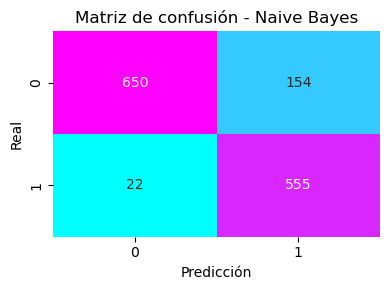

In [12]:
plt.figure(figsize=(4, 3))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="cool", cbar=False)

plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión - Naive Bayes")

plt.tight_layout()
plt.show()

Matriz de confusión Regresión Logística

In [13]:
cm_rl = confusion_matrix(y_test, y_pred_lg)
sensitivity, specifity, balanced_accuracy = sens_spec(cm_rl)
print(f"Sensibilidad: {sensitivity:.2f}")
print(f"Especificidad: {specifity:.2f}")
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

Sensibilidad: 0.80
Especificidad: 0.96
Balanced Accuracy: 0.88


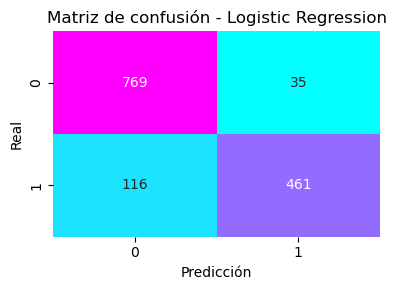

In [14]:
plt.figure(figsize=(4, 3))
sns.heatmap(cm_rl, annot=True, fmt="d", cmap="cool", cbar=False)

plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión - Logistic Regression")

plt.tight_layout()
plt.show()

Se puede observar que Naive Bayes comete más errores de Tipo I (Falsos positivos) mientras que Logistic Regression comete más errores de Tipo II (Falsos negativos). En el contexto del clasificador SPAM nos interesa minimizar los errores de Tipo I, ya que se prefiere no clasificar un email como spam cuando no lo era para no perder información importante.

6. Calcule la precisión y la recuperación de ambos modelos. Para cada métrica, ¿cuál es el mejor modelo? ¿Cómo se relacionan estas métricas con los tipos de errores analizados en el punto anterior? Expanda su respuesta.

In [15]:
def prec_rec(cm):
    prec = cm[1, 1] / np.sum(cm[:, 1])
    rec = cm[1, 1] / np.sum(cm[1, :])
    
    return prec, rec

Precisión y la recuperación - Naive Bayes

In [16]:
prec, rec = prec_rec(cm_nb)
print(f"Precisión: {prec:.2f}")
print(f"Recuperación: {rec:.2f}")

Precisión: 0.78
Recuperación: 0.96


Precisión y la recuperación - Logistic Regression

In [17]:
prec, rec = prec_rec(cm_rl)
print(f"Precisión: {prec:.2f}")
print(f"Recuperación: {rec:.2f}")

Precisión: 0.93
Recuperación: 0.80


En cuanto a la precisión Logistic Regression es mejor, es decir tiene menos errores de Tipo I (Falsos positivos) a expensas de cometer más de Tipo II. Pero en cuanto a la recuperación Naive Bayes es mejor, cometiendo menos errores de Tipo II (Falsos Negativos) a expensas de cometer más de Tipo I.

7. Obtenga la curva ROC y el AUC (Área Bajo la Curva ROC) de ambos modelos.

ROC y AUC - Naive Bayes

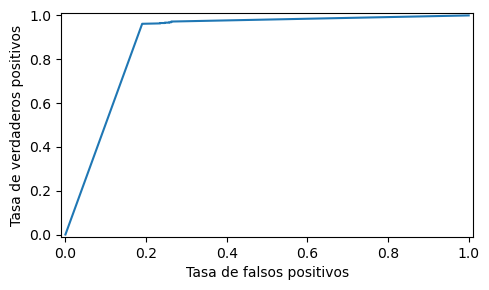

In [18]:
p_pred_nb = model_nb.predict_proba(X_test)

fpr, tpr, thr = roc_curve(y_test, p_pred_nb[:, 1])

plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr)
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.tight_layout()

In [19]:
print(f"AUC: {roc_auc_score(y_test, p_pred_nb[:, 1])}\n")

AUC: 0.8883463962682256



ROC  y AUC - Logistic Regression

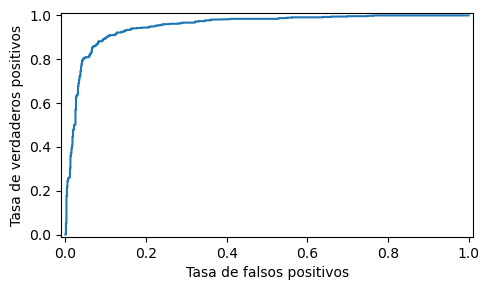

In [20]:
p_pred_lr = model_lg.predict_proba(X_test_scaled)

fpr, tpr, thr = roc_curve(y_test, p_pred_lr[:, 1])

plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr)
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.tight_layout()

In [21]:
print(f"AUC: {roc_auc_score(y_test, p_pred_lr[:, 1])}\n")

AUC: 0.9517242642937823

